# 1. Introduction
This research examines patterns in Spotify track features and determining what drives song popularity on the platform. Rather than simply characterize the dataset, we want to begin mod-eling our data and discover which musical features (e.g., energy,loudness,tempo,danceability)c orelatemost with higher engagement.

Why this matters:

Record labels, playlist creators and independent musicians are influenced in their marketing and recording choices by how fans are actively responding to music. Knowing what features are associated with popular tracks helps us to determine:

Production style

Playlist placement strategy

Promotion priorities

The goal of this project is to turn unprocessed track-level metrics into actionable insights, allowing artists to better understand when music should be either created or released.

# 2. Load Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [11]:
df = pd.read_csv('data/dataset.csv')
df.sample(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
29427,29427,3g7IooIVvcb9DAxmhbFkoc,Papa Khan,Wounds,Wounds,36,169045,True,0.473,0.831,0,-6.695,0,0.0656,0.023200,0.006380,0.1150,0.363,74.916,4,dubstep
78544,78544,0lUYpUxAJFNI2YW6qjjpkP,Michelle,Tabu (Deluxe),Aus und vorbei,29,209640,False,0.801,0.851,11,-4.168,1,0.0471,0.101000,0.000000,0.4570,0.831,128.052,4,party
43445,43445,75SRt8Ec8Lu1cNMkLolQnP,Novo Som,Herói dos Heróis,Meu Sonho,30,276410,False,0.562,0.503,0,-7.323,1,0.0256,0.203000,0.000001,0.1450,0.217,141.881,4,groove
87425,87425,0xaKeBp5xP2o0fsPr9iDDH,Legião Urbana,As Quatro Estações,Sete Cidades,44,205800,False,0.410,0.626,9,-13.010,0,0.0316,0.005500,0.000106,0.1900,0.594,78.895,4,r-n-b
9892,9892,4zmRo7Flwb6bzx2J0Yel6Q,Samuel Messias,Planos de Deus,Teu Amanhã Será Melhor que Hoje,43,250961,False,0.280,0.512,0,-6.932,1,0.0290,0.347000,0.000000,0.1080,0.494,80.795,1,brazil
72427,72427,46xcK3IlceaiXFuzOaLysR,Architects,the classic symptoms of a broken spirit,spit the bone,0,212479,False,0.323,0.850,1,-3.273,1,0.1120,0.000038,0.003030,0.1280,0.361,124.597,3,metalcore
30018,30018,7vv8wSGmc8Qm8o1qrgTEq1,David Guetta;Becky Hill;Ella Henderson,New Arrivals,Crazy What Love Can Do,0,169756,False,0.601,0.713,4,-3.758,0,0.0449,0.028200,0.000000,0.1580,0.464,122.872,4,edm
78183,78183,3zFti4DNHw0I0fGybRZxqS,Höhner,Best Of Karneval,Jetzt geht's los - Jahrmarkt-Mix,0,186746,False,0.723,0.925,6,-5.470,0,0.0893,0.008870,0.000006,0.7330,0.649,126.998,4,party
41530,41530,6R9j9XEisGCoIE8r8UtbiS,Nightwish,Imaginaerum,Last Ride of the Day,53,271120,False,0.448,0.951,2,-3.391,0,0.0522,0.002470,0.000000,0.0862,0.581,161.974,3,goth
52537,52537,5D24PDGJzk3Ctd0L1iAwm9,George Jones,I Lived To Tell It All,I Must Have Done Something Bad,13,199933,False,0.541,0.333,3,-11.414,1,0.0256,0.546000,0.000000,0.2090,0.332,78.910,3,honky-tonk


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [8]:
# check for duplicate rows
df.duplicated().sum()

0

In [9]:
# check for missing values
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

“Since only one row had missing values in important artists, album_name, track_name columns, it was removed to maintain data quality without affecting overall analysis.”

In [13]:
# drop missing values   
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

In [15]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,32909.243463,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,56999.000000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.500000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


# 3. Analysis

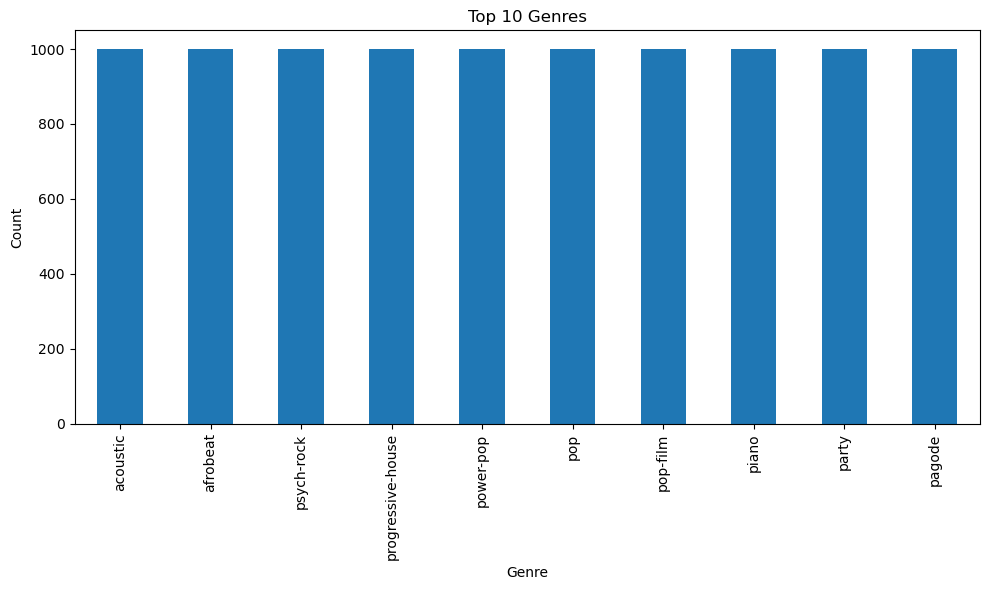

In [19]:
import matplotlib.pyplot as plt

top_genres = df['track_genre'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_genres.plot(kind='bar')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(r'C:\Project Data\spotify-music-insights\visuals\top_genres.png', dpi=300, bbox_inches='tight')
plt.show()


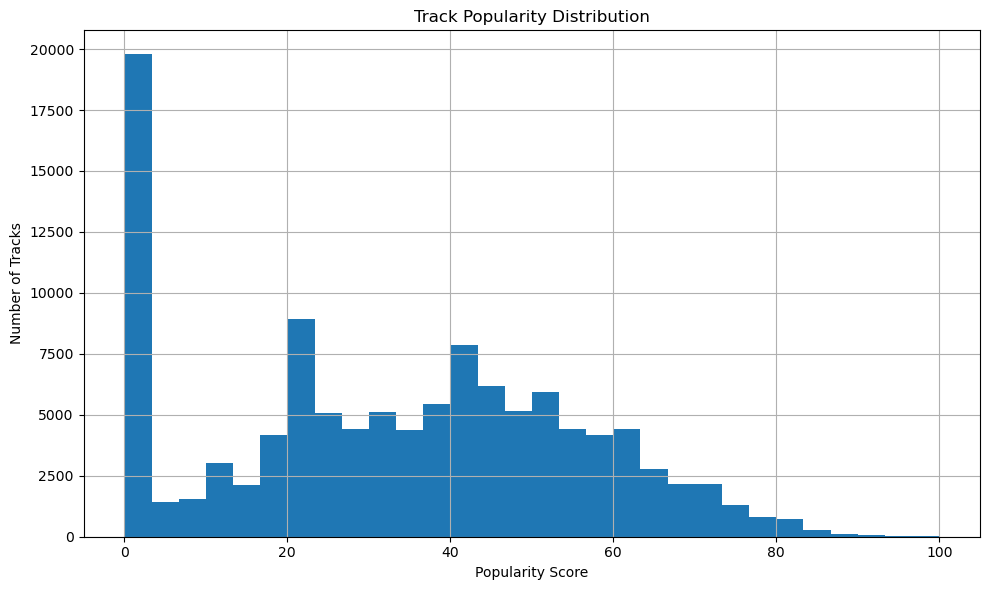

In [22]:
plt.figure(figsize=(10,6))
df['popularity'].hist(bins=30)
plt.title('Track Popularity Distribution')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.tight_layout()
plt.savefig(r'C:\Project Data\spotify-music-insights\visuals\popularity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


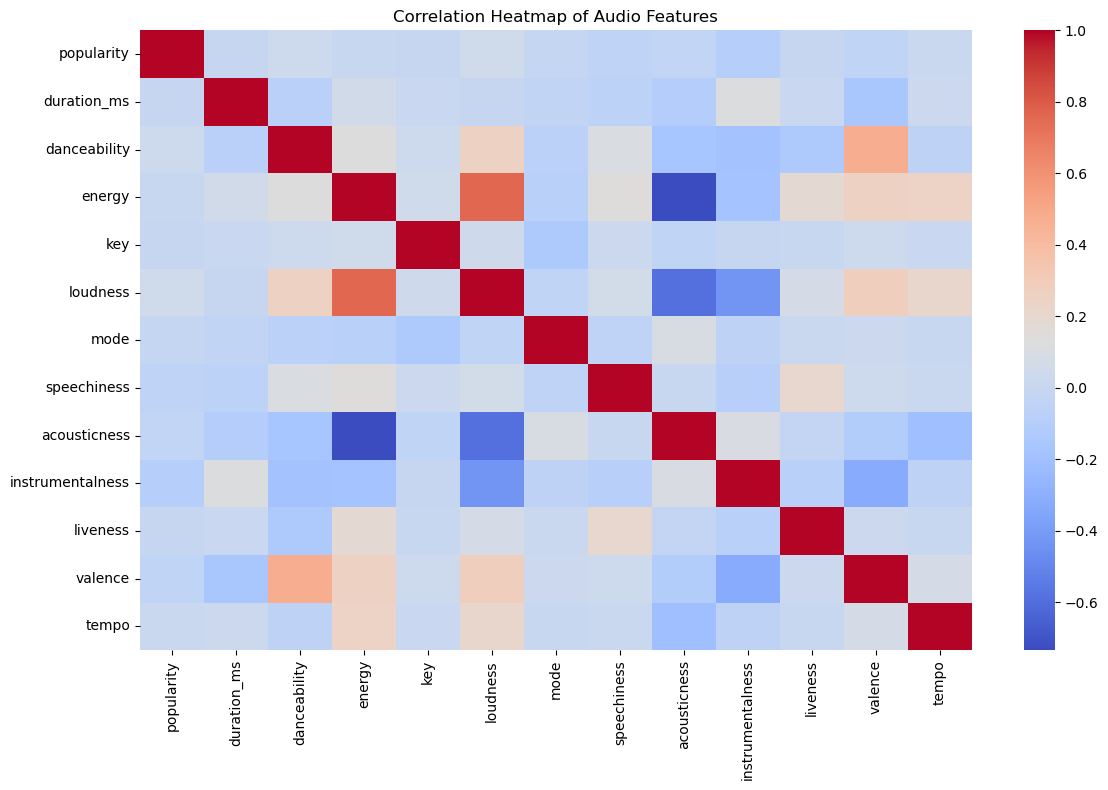

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df[['popularity', 'duration_ms', 'danceability', 'energy', 'key',
                   'loudness', 'mode', 'speechiness', 'acousticness',
                   'instrumentalness', 'liveness', 'valence', 'tempo']]

corr = numeric_cols.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Audio Features')
plt.tight_layout()
plt.savefig(r'C:\Project Data\spotify-music-insights\visuals\correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
